## Assignment - 1
# 1. Load and Inspect the CMAPSS Dataset
Task:

Write Python code to load the raw train_FD001.txt dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
Expected Output: DataFrame shape, info, and sample rows.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
column_names = [
    "engine_id", "cycle",
    "op_setting_1", "op_setting_2", "op_setting_3"
] + [f"sensor_{i}" for i in range(1,22)]


In [36]:
df = pd.read_csv(
    '/content/train_FD001.txt',
    sep='\s+',
    header=None,
    names=column_names
)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3933528803.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


In [37]:
df.head()

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sensor_14     20631 non-nu

In [39]:
df.dtypes

,0
engine_id,int64
cycle,int64
op_setting_1,float64
op_setting_2,float64
op_setting_3,float64
sensor_1,float64
sensor_2,float64
sensor_3,float64
sensor_4,float64
sensor_5,float64


In [40]:
df.shape

(20631, 26)

## 2. Visualize Sensor Distributions and Identify Missing Values
Task:

Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
Expected Output: Three histogram plots and a summary/report on missing values per column.

In [41]:
df.isnull().sum()

,0
engine_id,0
cycle,0
op_setting_1,0
op_setting_2,0
op_setting_3,0
sensor_1,0
sensor_2,0
sensor_3,0
sensor_4,0
sensor_5,0


In [42]:
if df.isnull().any().any():
  df = df.fillna(method='ffill').fillna(method='bfill')
  print('Missing values after filling:', df.isnull().sum().sum())
else:
  print('No missing values detected')

No missing values detected


In [43]:
import seaborn as sns

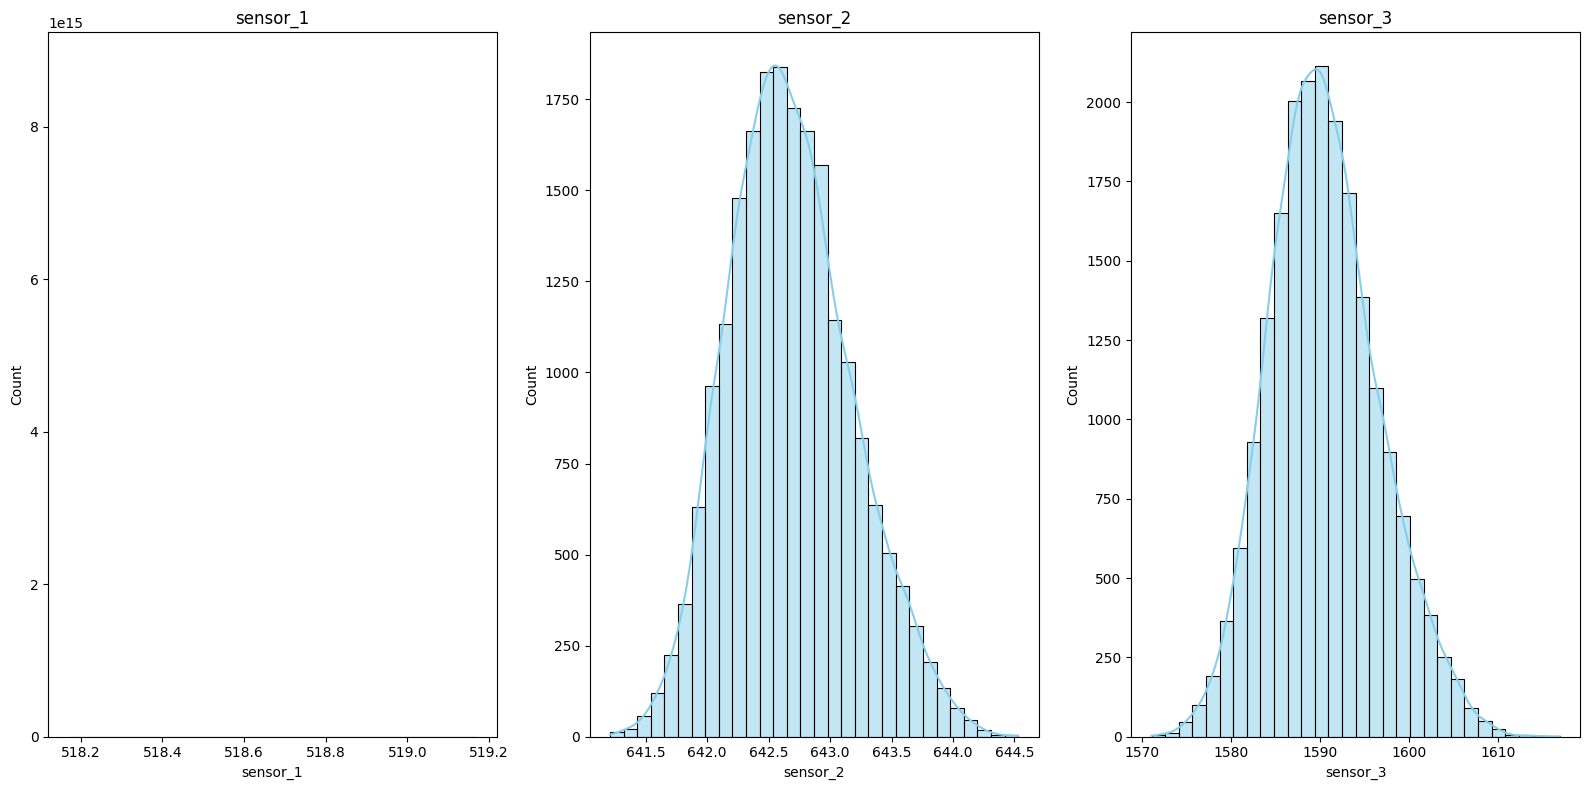

In [44]:
sensor_cols = [col for col in df.columns if "sensor_" in col]
plt.figure(figsize=(16,8))
for i, col in enumerate(sensor_cols[:3], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


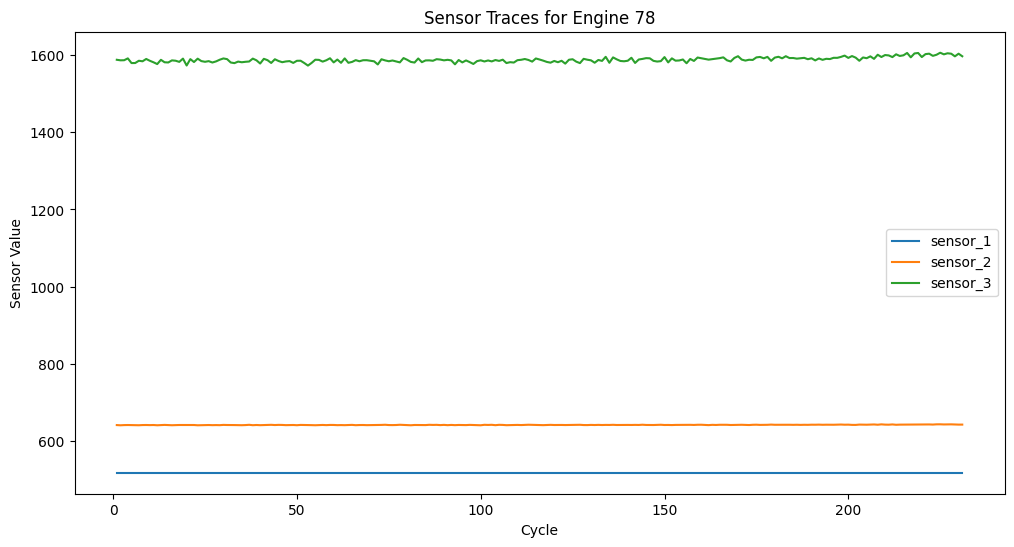

In [45]:
## Visualize a random engine's sensor history
engine_id = np.random.choice(df['engine_id'].unique())
sample = df[df['engine_id'] == engine_id]
plt.figure(figsize=(12, 6))
for col in sensor_cols[:3]:
  plt.plot(sample['cycle'], sample[col],label=col)
plt.title(f'Sensor Traces for Engine {engine_id}')
plt.xlabel('Cycle')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

Based on the output of df.isnull().sum(), there are no missing values in any of the columns. The histograms show the distribution of values for sensor_1, sensor_2, and sensor_3.

## 3. Feature Engineering – Aggregation and Rolling Statistics
Task:

For a selected sensor (e.g., sensor_2), compute and append to the DataFrame:
The mean and standard deviation of sensor_2 by each engine_id

The rolling mean (window size=5) for each engine’s sensor_2 readings

Expected Output: Show a few sample rows with these new features.

In [50]:
# Aggregate features: mean and std of sensor_2 per engine
agg_sensor2 = df.groupby('engine_id')['sensor_2'].agg(['mean', 'std']).reset_index()
agg_sensor2.rename(columns={'mean': 'sensor_2_mean', 'std': 'sensor_2_std'}, inplace=True)

In [51]:
agg_sensor2.head()

,engine_id,sensor_2_mean,sensor_2_std
0,1,642.621042,0.486795
1,2,642.435226,0.560214
2,3,642.543743,0.474190
3,4,642.662381,0.441446
4,5,642.451970,0.551542


In [52]:
df = df.merge(agg_sensor2, on='engine_id', how='left')

In [58]:
# Rolling mean (window=5) for sensor_2 per engine
df['sensor_2_rollmean5'] = (df.groupby('engine_id')['sensor_2'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True))

In [59]:
df[['engine_id','cycle','sensor_2','sensor_2_mean','sensor_2_std','sensor_2_rollmean5']].head(10)

,engine_id,cycle,sensor_2,sensor_2_mean,sensor_2_std,sensor_2_rollmean5
0,1,1,641.82,642.621042,0.486795,641.820000
1,1,2,642.15,642.621042,0.486795,641.985000
2,1,3,642.35,642.621042,0.486795,642.106667
3,1,4,642.35,642.621042,0.486795,642.167500
4,1,5,642.37,642.621042,0.486795,642.208000
5,1,6,642.10,642.621042,0.486795,642.264000
6,1,7,642.48,642.621042,0.486795,642.330000
7,1,8,642.56,642.621042,0.486795,642.372000
8,1,9,642.12,642.621042,0.486795,642.326000
9,1,10,641.71,642.621042,0.486795,642.194000


## 4. Data Normalization
Task:

Normalize all sensor columns in the DataFrame using StandardScaler from scikit-learn (zero mean, unit variance) and create a new DataFrame, maintaining the original engine_id and cycle columns.
Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [60]:
from sklearn.preprocessing import StandardScaler

In [64]:
from sklearn.preprocessing import StandardScaler
sensor_cols = [col for col in df.columns if 'sensor_' in col]
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[sensor_cols] = scaler.fit_transform(df[sensor_cols])


In [66]:
display(df_scaled[['engine_id','cycle'] + sensor_cols[:5]].head())
df_scaled[sensor_cols].agg(['mean','std']).T
df.head(10)

,engine_id,cycle,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,1,1,0.0,-1.721725,-0.134255,-0.925936,-1.776357e-15
1,1,2,0.0,-1.061780,0.211528,-0.643726,-1.776357e-15
2,1,3,0.0,-0.661813,-0.413166,-0.525953,-1.776357e-15
3,1,4,0.0,-0.661813,-1.261314,-0.784831,-1.776357e-15
4,1,5,0.0,-0.621816,-1.251528,-0.301518,-1.776357e-15


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_2_rollmean5,sensor_2_mean,sensor_2_std
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,641.820000,642.621042,0.486795
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,641.985000,642.621042,0.486795
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,642.106667,642.621042,0.486795
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,642.167500,642.621042,0.486795
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,642.208000,642.621042,0.486795
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8.4108,0.03,391,2388,100.0,38.98,23.3669,642.264000,642.621042,0.486795
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,8.3974,0.03,392,2388,100.0,39.10,23.3774,642.330000,642.621042,0.486795
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,8.4076,0.03,391,2388,100.0,38.97,23.3106,642.372000,642.621042,0.486795
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,8.3728,0.03,392,2388,100.0,39.05,23.4066,642.326000,642.621042,0.486795
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,8.4286,0.03,393,2388,100.0,38.95,23.4694,642.194000,642.621042,0.486795


## 5. Rolling Window Sequence Generation
Task:

Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
Expected Output: Array shape, example content, and confirmation of successful file saves.

In [75]:
# Columns to use as features (exclude id and cycle, plus target if any)
exclude_cols = ['engine_id', 'cycle']
feature_cols = [col for col in df.columns if col not in exclude_cols]

# Sort data by engine_id and cycle to ensure correct temporal order
df = df.sort_values(['engine_id', 'cycle']).reset_index(drop=True)

In [76]:
def generate_rolling_windows(data, engine_col, features, window_size=30):
    sequences = []
    engine_ids = []
    cycle_ids = []

    for engine in data[engine_col].unique():
        engine_data = data[data[engine_col] == engine]
        engine_features = engine_data[features].values

        # Generate sequences with rolling window
        for i in range(window_size - 1, len(engine_data)):
            seq = engine_features[i - window_size + 1 : i + 1]
            sequences.append(seq)
            engine_ids.append(engine)
            cycle_ids.append(engine_data.iloc[i]['cycle'])

    # Convert to array for modeling
    sequences = np.array(sequences)
    return sequences, engine_ids, cycle_ids

In [77]:
window_size = 30  # Typical rolling window length; adjust as needed
sequences, engine_ids, cycle_ids = generate_rolling_windows(df, 'engine_id', feature_cols, window_size)

print("Shape of rolling window sequences:", sequences.shape)  # (num_sequences, window_size, num_features)
print("Example sequence shape:", sequences[0].shape)

Shape of rolling window sequences: (17731, 30, 27)
Example sequence shape: (30, 27)


In [79]:
# Print the first sequence info
print(f"Engine ID: {engine_ids[0]}, Cycle: {cycle_ids[0]}")
print("Sequence data for first time window (shape {}):".format(sequences[0].shape))
print(sequences[0])

Engine ID: 1, Cycle: 30.0
Sequence data for first time window (shape (30, 27)):
[[-7.00000000e-04 -4.00000000e-04  1.00000000e+02  5.18670000e+02
   6.41820000e+02  1.58970000e+03  1.40060000e+03  1.46200000e+01
   2.16100000e+01  5.54360000e+02  2.38806000e+03  9.04619000e+03
   1.30000000e+00  4.74700000e+01  5.21660000e+02  2.38802000e+03
   8.13862000e+03  8.41950000e+00  3.00000000e-02  3.92000000e+02
   2.38800000e+03  1.00000000e+02  3.90600000e+01  2.34190000e+01
   6.41820000e+02  6.42621042e+02  4.86795224e-01]
 [ 1.90000000e-03 -3.00000000e-04  1.00000000e+02  5.18670000e+02
   6.42150000e+02  1.59182000e+03  1.40314000e+03  1.46200000e+01
   2.16100000e+01  5.53750000e+02  2.38804000e+03  9.04407000e+03
   1.30000000e+00  4.74900000e+01  5.22280000e+02  2.38807000e+03
   8.13149000e+03  8.43180000e+00  3.00000000e-02  3.92000000e+02
   2.38800000e+03  1.00000000e+02  3.90000000e+01  2.34236000e+01
   6.41985000e+02  6.42621042e+02  4.86795224e-01]
 [-4.30000000e-03  3.00000

In [80]:
# Check that sequence length matches window size
assert sequences.shape[1] == window_size, "Sequence window length mismatch"

# Check that sequences are ordered by cycle (manual inspection example)
assert all(cycle_ids[i] > cycle_ids[i-1] or engine_ids[i] != engine_ids[i-1] for i in range(1, len(cycle_ids))), "Cycle order violation"

print("Basic validation checks passed.")

Basic validation checks passed.


In [81]:
# Save sequences and metadata for modeling
np.save('rolling_window_sequences.npy', sequences)
pd.DataFrame({'engine_id': engine_ids, 'cycle': cycle_ids}).to_csv('sequence_metadata.csv', index=False)